In [1]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

Importing plotly failed. Interactive plots will not work.


In [2]:
#!pip install seaborn

In [3]:
df=pd.read_csv("/mnt/c/Users/joaof/Documents/full_data_by15.csv",usecols=[1,2])

In [4]:
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,y
0,2019-12-01 00:00:00,36
1,2019-12-01 00:15:00,11
2,2019-12-01 00:30:00,5
3,2019-12-01 00:45:00,4
4,2019-12-01 01:00:00,3
...,...,...
35389,2020-12-03 17:15:00,18
35390,2020-12-03 17:30:00,20
35391,2020-12-03 17:45:00,14
35392,2020-12-03 18:00:00,13


In [5]:
print('-'*60)
print('*** Head of the dataframe ***')
print('-'*60)
print(df.head())
print('-'*60)
print('*** Tail of the dataframe ***')
print('-'*60)
print(df.tail())

------------------------------------------------------------
*** Head of the dataframe ***
------------------------------------------------------------
                   ds   y
0 2019-12-01 00:00:00  36
1 2019-12-01 00:15:00  11
2 2019-12-01 00:30:00   5
3 2019-12-01 00:45:00   4
4 2019-12-01 01:00:00   3
------------------------------------------------------------
*** Tail of the dataframe ***
------------------------------------------------------------
                       ds   y
35389 2020-12-03 17:15:00  18
35390 2020-12-03 17:30:00  20
35391 2020-12-03 17:45:00  14
35392 2020-12-03 18:00:00  13
35393 2020-12-03 18:15:00   4


In [6]:
## Plot the Time series data
#fig, ax = plt.subplots(figsize=(20,7))
#a = sns.lineplot(x="ds", y="y", data=df)
#a.set_title("Daily Sales Data",fontsize=15)
#plt.show()

In [7]:
end_date = '2020-10-31'
mask1 = (df['ds'] <= end_date)
mask2 = (df['ds'] > end_date)

In [8]:
X_tr = df.loc[mask1]
X_tst = df.loc[mask2]
print("train shape",X_tr.shape)
print("test shape",X_tst.shape)

train shape (32157, 2)
test shape (3237, 2)


In [9]:
model =Prophet()
model.fit(X_tr)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [10]:
future = model.make_future_dataframe(periods=57, freq='15T')

In [11]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
32207,2020-10-31 12:45:00,13.735509,0.281228,26.273959
32208,2020-10-31 13:00:00,12.993175,-0.587380,25.589033
32209,2020-10-31 13:15:00,12.417437,-0.012000,24.960291
32210,2020-10-31 13:30:00,12.023379,-1.075562,23.670145
32211,2020-10-31 13:45:00,11.814484,-0.362665,24.515567
32212,2020-10-31 14:00:00,11.782856,-0.844514,24.628174
32213,2020-10-31 14:15:00,11.910087,-1.209073,24.863983


In [12]:
X_tst_forecast = model.predict(X_tst)
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
3230,2020-12-03 16:45:00,20.892106,1.585394,38.647584
3231,2020-12-03 17:00:00,20.580980,1.668367,38.675744
3232,2020-12-03 17:15:00,20.123918,1.225187,39.274691
3233,2020-12-03 17:30:00,19.537491,2.223739,38.067693
3234,2020-12-03 17:45:00,18.844979,0.144607,36.294422
3235,2020-12-03 18:00:00,18.074659,-0.275864,37.001963
3236,2020-12-03 18:15:00,17.257868,-0.953487,34.955199


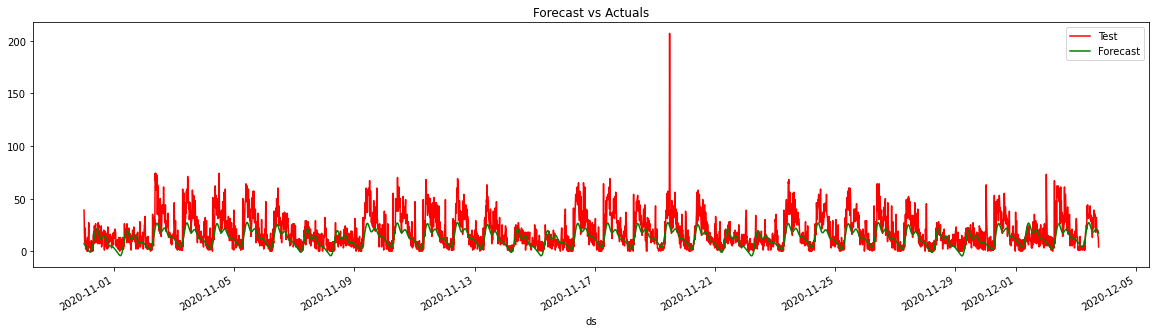

In [13]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(20)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAE",round(mae,4))

MAE 8.9104


In [15]:
mse=mean_squared_error(X_tst['y'],X_tst_forecast['yhat'])
print("RMSE",round(np.sqrt(mse),4))

RMSE 13.0015


In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true))) * 100
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAPE",round(mape,4))

MAPE inf


/home/john/.conda/envs/py3-wsl/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
import holidays

In [18]:
holiday = pd.DataFrame([])
for date, name in sorted(holidays.Portugal(years=[2018,2019,2020]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "PT-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [19]:
# Setup and train model with holidays
model_with_holidays = Prophet(holidays=holiday)
model_with_holidays.fit(X_tr)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [20]:
future = model_with_holidays.make_future_dataframe(periods=57, freq='15T')
forecast = model_with_holidays.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
32207,2020-10-31 12:45:00,13.875456,1.099252,27.345774
32208,2020-10-31 13:00:00,13.133012,-1.019077,26.511146
32209,2020-10-31 13:15:00,12.557186,-0.043827,26.131859
32210,2020-10-31 13:30:00,12.163065,-0.475023,25.023926
32211,2020-10-31 13:45:00,11.954131,0.556775,25.914067
32212,2020-10-31 14:00:00,11.922486,-0.903765,24.622101
32213,2020-10-31 14:15:00,12.049720,-0.973451,24.784356


In [21]:
#################3

In [22]:
from sklearn.model_selection import ParameterGrid
params_grid = {
               'changepoint_prior_scale':[0.1,0.2,0.4],
              'holidays_prior_scale':[0.1,0.2,0.4],
              'n_changepoints' : [100,150,200,250,300]}
grid = ParameterGrid(params_grid)

print('Total Possible Models',len(grid))

Total Possible Models 45


In [23]:
strt = '2020-10-31'
end='2020-12-04'
model_parameters = pd.DataFrame(columns = ['MAE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = 'multiplicative',
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         #holidays=holiday, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='PT')
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=3237, freq='15T',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>strt) & (df['ds']<=end)]
    MAE = mean_absolute_error(Actual['y'],abs(test['yhat']))
    mse=mean_squared_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Error(MAE)',"-"*20,MAE,"\nRoot Mean Squared Error (RMSE)","-"*20,round(np.sqrt(mse),4))
    model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100}
Mean Absolute Error(MAE) -------------------- 9.246076389446085 
Root Mean Squared Error (RMSE) -------------------- 13.4917
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150}
Mean Absolute Error(MAE) -------------------- 9.132529765675011 
Root Mean Squared Error (RMSE) -------------------- 13.3233
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200}
Mean Absolute Error(MAE) -------------------- 8.679470097241088 
Root Mean Squared Error (RMSE) -------------------- 12.6501
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 250}
Mean Absolute Error(MAE) -------------------- 9.885454174537102 
Root Mean Squared Error (RMSE) -------------------- 14.2721
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 300}
Mean Absolute Error(MAE) -------------------- 9.068727523418604 
Root Mean 

In [32]:
parameters = model_parameters.sort_values(by=['MAE'])
parameters = parameters.reset_index(drop=True)


0     {'changepoint_prior_scale': 0.1, 'holidays_pri...
1     {'changepoint_prior_scale': 0.2, 'holidays_pri...
2     {'changepoint_prior_scale': 0.4, 'holidays_pri...
3     {'changepoint_prior_scale': 0.2, 'holidays_pri...
4     {'changepoint_prior_scale': 0.2, 'holidays_pri...
5     {'changepoint_prior_scale': 0.4, 'holidays_pri...
6     {'changepoint_prior_scale': 0.1, 'holidays_pri...
7     {'changepoint_prior_scale': 0.4, 'holidays_pri...
8     {'changepoint_prior_scale': 0.1, 'holidays_pri...
9     {'changepoint_prior_scale': 0.2, 'holidays_pri...
10    {'changepoint_prior_scale': 0.2, 'holidays_pri...
11    {'changepoint_prior_scale': 0.1, 'holidays_pri...
12    {'changepoint_prior_scale': 0.2, 'holidays_pri...
13    {'changepoint_prior_scale': 0.4, 'holidays_pri...
14    {'changepoint_prior_scale': 0.1, 'holidays_pri...
15    {'changepoint_prior_scale': 0.4, 'holidays_pri...
16    {'changepoint_prior_scale': 0.4, 'holidays_pri...
17    {'changepoint_prior_scale': 0.2, 'holidays

In [ ]:
#{'changepoint_prior_scale': 0.1, 'holidays_pri...
